<a href="https://colab.research.google.com/github/soufianeze/Projet_certification_Bloc_n_6/blob/main/Projet_Final_DATA_FULL_STACK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Patient Survival Prediction

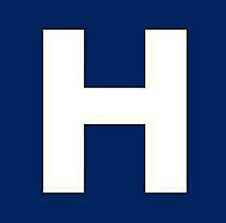

In [ ]:
# Importation des bibliothèques necessaires pour le projet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy.stats import chi2_contingency
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import recall_score, precision_score
from sklearn import svm
from sklearn import neighbors
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm
import itertools
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import itertools 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from google.colab import drive
from numpy import *
from collections import Counter
drive.mount('/content/gdrive')
from functions import plot_confusion_matrix

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

In [ ]:
# Charger le dataset et afficher les premières lignes
df=pd.read_csv('gdrive/My Drive/Patient_Survival.csv')
df.head(5)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,92,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


# EDA : Exploratory Data Analysis

In [ ]:
# Frequence de la target
df['hospital_death'].value_counts(normalize = True)

0    0.913698
1    0.086302
Name: hospital_death, dtype: float64

In [ ]:
# Effectifs de la target
df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [ ]:
# Valeures manquantes
print('Data columns with null values:',df.isnull().sum(), sep = '\n')

Data columns with null values:
encounter_id                         0
patient_id                           0
hospital_id                          0
age                               4228
bmi                               3429
elective_surgery                     0
ethnicity                         1395
gender                              25
height                            1334
icu_admit_source                   112
icu_id                               0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
weight                            2720
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
gcs_eyes_apache                   1901
gcs_motor_apache                  1901
gcs_unable_apache                 1037
gcs_verbal_apache                 1901
heart_rate_apache                  878
intubated_apache                 

In [ ]:
# Pourcentage des valeurs manquantes
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

encounter_id                       0.00
patient_id                         0.00
hospital_id                        0.00
age                                4.61
bmi                                3.74
elective_surgery                   0.00
ethnicity                          1.52
gender                             0.03
height                             1.45
icu_admit_source                   0.12
icu_id                             0.00
icu_stay_type                      0.00
icu_type                           0.00
pre_icu_los_days                   0.00
weight                             2.97
apache_2_diagnosis                 1.81
apache_3j_diagnosis                1.20
apache_post_operative              0.00
arf_apache                         0.78
gcs_eyes_apache                    2.07
gcs_motor_apache                   2.07
gcs_unable_apache                  1.13
gcs_verbal_apache                  2.07
heart_rate_apache                  0.96
intubated_apache                   0.78


In [ ]:
# Statistiques des variables 
df.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 83,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,90051.000000,90612.000000,91713.000000,90998.000000,89812.000000,89812.000000,90676.000000,89812.000000,90835.000000,90998.000000,90719.000000,90479.000000,87605.000000,90998.000000,91548.000000,91548.000000,90673.000000,90673.000000,91568.000000,91568.000000,91493.000000,91493.000000,90234.000000,90234.000000,91328.000000,91328.000000,91380.000000,91380.000000,91554.000000,91554.00000,90686.000000,90686.000000,89389.000000,89389.000000,88094.000000,88094.000000,84363.000000,84363.000000,88923.000000,88923.000000,87074.000000,87074.000000,82629.000000,82629.000000,87356.000000,87356.000000,87528.000000,87528.000000,88102.000000,88102.000000,84372.000000,84372.000000,85906.000000,85906.000000,82128.000000,82128.000000,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,0.0,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,185.401739,558.216377,0.201106,0.027979,3.465049,5.471195,0.009528,3.994778,99.707932,0.151223,88.015873,25.811007,36.414472,0.325721,88.491873,50.161314,88.610513,50.242597,103.000568,70.321848,104.651339,64.871859,104.590454,64.941541,28.882774,12.846279,99.241836,90.454826,148.339745,96.92387,148.235549,96.993313,37.284201,36.268391,75.354508,62.838150,75.805934,63.270616,92.229198,83.663720,91.612950,79.400028,91.594126,79.709315,22.633614,17.211525,98.044637,95.174310,133.247395,116.362296,133.054686,116.549625,174.638023,114.380940,4.251594,3.934658,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,NaN,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,86.050882,463.266985,0.400829,0.164912,0.951715,1.288376,0.097148,1.560166,30.870502,0.358268,42.032412,15.106312,0.833496,0.468646,19.798379,13.317586,19.793743,13.341521,22.017346,17.115903,20.808358,15.679680,20.701171,15.701305,10.701973,5.064943,1.794181,10.030069,25.733259,20.67793,25.792453,20.705016,0.693287,0.745147,18.409190,16.363229,18.481826,16.422063,21.823704,20.279869,20.533174,19.130590,20.552018,19.236507,7.515043,6.072588,3.212934,6.625227,27.556986,26.510637,27.679751,26.623528,86.687955,38.273013,0.667355,0.579610,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,NaN,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,101.000000,0.010000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,30.000000,0.000000,40.000000,4.000000,32.

# Preprocessing

In [ ]:
# Les colonnes à retenir
 
col = ['age', 'elective_surgery', 'ethnicity', 'gender', 'icu_admit_source',
       'icu_type', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis',
       'apache_post_operative', 'arf_apache', 'gcs_eyes_apache',
       'gcs_motor_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_min', 'd1_heartrate_max', 'd1_mbp_min',
       'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_min', 'd1_sysbp_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_noninvasive_max',
       'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max',
       'd1_potassium_min', 'apache_4a_hospital_death_prob',
       'apache_4a_icu_death_prob', 'aids', 'cirrhosis', 'diabetes_mellitus',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem', 'hospital_death']
df = df[col]

In [ ]:
# Enelver les NaN

df = df.dropna()

len(df)

57324

In [ ]:
# Supprimer les valeurs aberrantes 

df = df[df.pre_icu_los_days>=0]                                                                                                                                                  
df = df[df.apache_4a_hospital_death_prob>=0]                                               
df = df[df.apache_4a_icu_death_prob>=0]

In [ ]:
len(df)

56276

In [ ]:
# Création des datasets target et features

target_name = 'hospital_death'

y = df.loc[:,target_name]
X = df.loc[:,[c for c in df.columns if c!=target_name]] 

In [ ]:
# Encodages des variables catégorielles 

labelEncoder= LabelEncoder()
X['icu_type'] = labelEncoder.fit_transform(X['icu_type'])
X['ethnicity'] = labelEncoder.fit_transform(X['ethnicity'])
X['apache_3j_bodysystem'] = labelEncoder.fit_transform(X['apache_3j_bodysystem'])
X['gender'] = labelEncoder.fit_transform(X['gender'])
X['icu_admit_source'] = labelEncoder.fit_transform(X['icu_admit_source'])
X['apache_2_bodysystem'] = labelEncoder.fit_transform(X['apache_2_bodysystem'])

In [ ]:
# Séparer les variables numériques et les variables catégorielles 

idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
        numeric_indices.append(idx)
    else :
        categorical_features.append(i)
        categorical_indices.append(idx)

    idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['age', 'elective_surgery', 'ethnicity', 'gender', 'icu_admit_source', 'icu_type', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis', 'apache_post_operative', 'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache', 'd1_diasbp_min', 'd1_heartrate_max', 'd1_mbp_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_min', 'd1_sysbp_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max', 'd1_potassium_min', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', '

In [ ]:
# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
featureencoder = ColumnTransformer(
    transformers=[    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X = featureencoder.fit_transform(X)

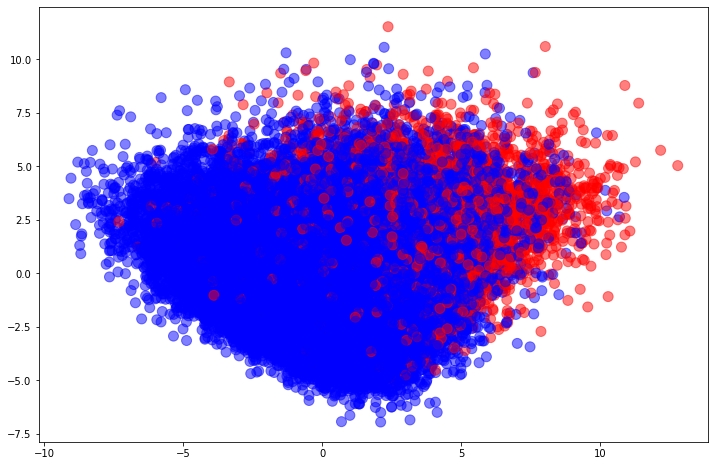

In [ ]:
# Visualisation le dataset avant SMOTE

model = PCA(n_components=2)
model.fit(X)

x_pca = model.transform(X)
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap= 'bwr', s=100, alpha=0.5);

In [ ]:
# Division de la data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#Utilisation de SMOTE pour équilibrer le dataset

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

y = y_res
X = X_res

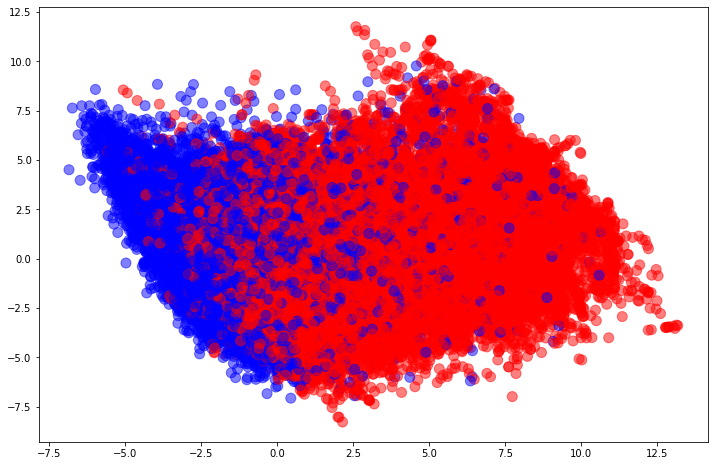

In [ ]:
# Visualisation le dataset après SMOTE

model = PCA(n_components=2)
model.fit(X)

x_pca = model.transform(X_train)
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y_train, cmap= 'bwr', s=100, alpha=0.5);

# Modélisation

## Régression logistique

In [ ]:
# Hyperparamètres par defaut
rl = LogisticRegression()
rl.fit(X_train, y_train)

LogisticRegression()

### **Evaluation**

#### Evaluation sur les données d'entrainements 

In [ ]:
y_pred_train = rl.predict(X_train)

print('F1 score:', f1_score(y_train, y_pred_train))
print('Prcision:',precision_score(y_train, y_pred_train))
print('Recall', recall_score(y_train, y_pred_train))

F1 score: 0.7862908263987806
Prcision: 0.8069810982021492
Recall 0.7666349925687693


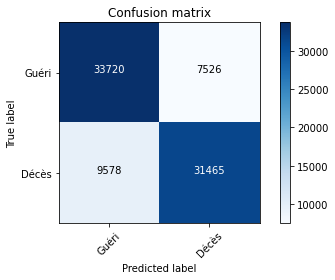

In [ ]:
class_names=(['Guéri','Décès'])
cm = confusion_matrix(y_train, y_pred_train)
plot_confusion_matrix(cm, class_names);

#### Evaluation sur les données de test

In [ ]:
y_pred_test = rl.predict(X_test)

print('F1 score:', f1_score(y_test, y_pred_test))
print('Prcision:',precision_score(y_test, y_pred_test))
print('Recall', recall_score(y_test, y_pred_test))


F1 score: 0.7852718172357401
Prcision: 0.8092125421305281
Recall 0.7627069695802849


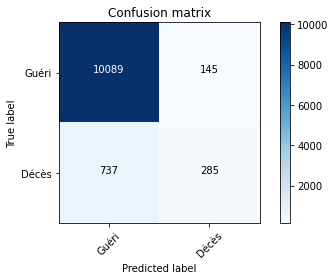

In [ ]:
# Matrice de confusion
class_names=(['Guéri','Décès'])
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm, class_names);

On constate que notre modele de Regression logistique nous permet d'avoir un nombre de 737 de faux Negatifs 

### Validation

[ 6583 13166 19749 26332 32915 39498 46081 52664 59247 65831]


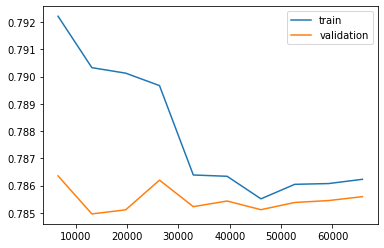

In [ ]:
# Learning curve
N, train_score, val_score = learning_curve(rl, X_train, y_train,
                                          train_sizes = np.linspace(0.1, 1.0, 10), cv = 5,scoring='f1')
print(N)
plt.plot(N, train_score.mean(axis = 1), label='train')
plt.plot(N, val_score.mean(axis = 1), label='validation')
plt.xlabel= ('train_size')
plt.legend();

In [ ]:
# Ignorer les erreurs 
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

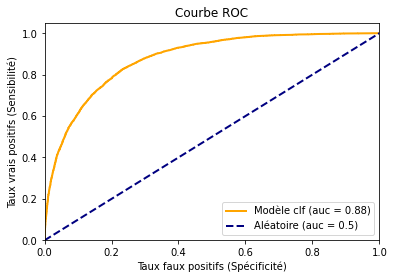

In [ ]:
# ROC
probs = rl.predict_proba(X_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, seuils = roc_curve(y_test, probs[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='orange',lw=2, label='Modèle clf (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('Taux vrais positifs (Sensibilité)')
plt.xlabel('Taux faux positifs (Spécificité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right");

## Arbre de décision classification

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

### **Evaluation**

#### Evaluation sur les données de test

In [ ]:
y_pred_test = rf.predict(X_test)

print('F1 score:', f1_score(y_test, y_pred_test))
print('Prcision:',precision_score(y_test, y_pred_test))
print('Recall', recall_score(y_test, y_pred_test))


F1 score: 0.9631045689160773
Prcision: 0.9563401670463174
Recall 0.9699653446284174


### Validation

In [ ]:
# Ignorer les erreurs 
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

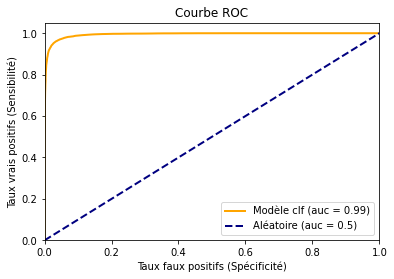

In [ ]:
# ROC
probs = rf.predict_proba(X_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, seuils = roc_curve(y_test, probs[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='orange',lw=2, label='Modèle clf (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('Taux vrais positifs (Sensibilité)')
plt.xlabel('Taux faux positifs (Spécificité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right");